In [15]:
# import libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#import os package to automate our directory
import os

# data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns





In [16]:
df = pd.read_csv(f"{os.getcwd()}/Grintern.csv") #importing database
df['Created Time'] = pd.to_datetime(df['Created Time']) #converting date column from string to datetime
df = df.sort_values(by=['Created Time']) #sorting by date
df['month'] = df['Created Time'].dt.to_period('M') #creating month categories
var = pd.crosstab(index=df["Stage"], columns=df['month']) #crosstab by stage every month
var["Total"] = var.sum(axis=1) #Sum of leads for every stage
total = var.pop('Total') 
var = var.reindex(["Shown Interest", "Intro Call Fixed", "Follow up (client did not come)", "Follow-up Job", "Job Intake Call", 'Follow up (after intake call)', "Proposal Made", "Hiring", "Interviewed", "Closure Process", "Closed Won", "Closed Lost", "Process Lost"])
var.insert(0,'Total', total) # placing totals in the 1st column
cohort_size = var.iloc[:, 0]
retention_matrix = var.divide(cohort_size, axis=0) #retention matrix is ready. Lets plot it!

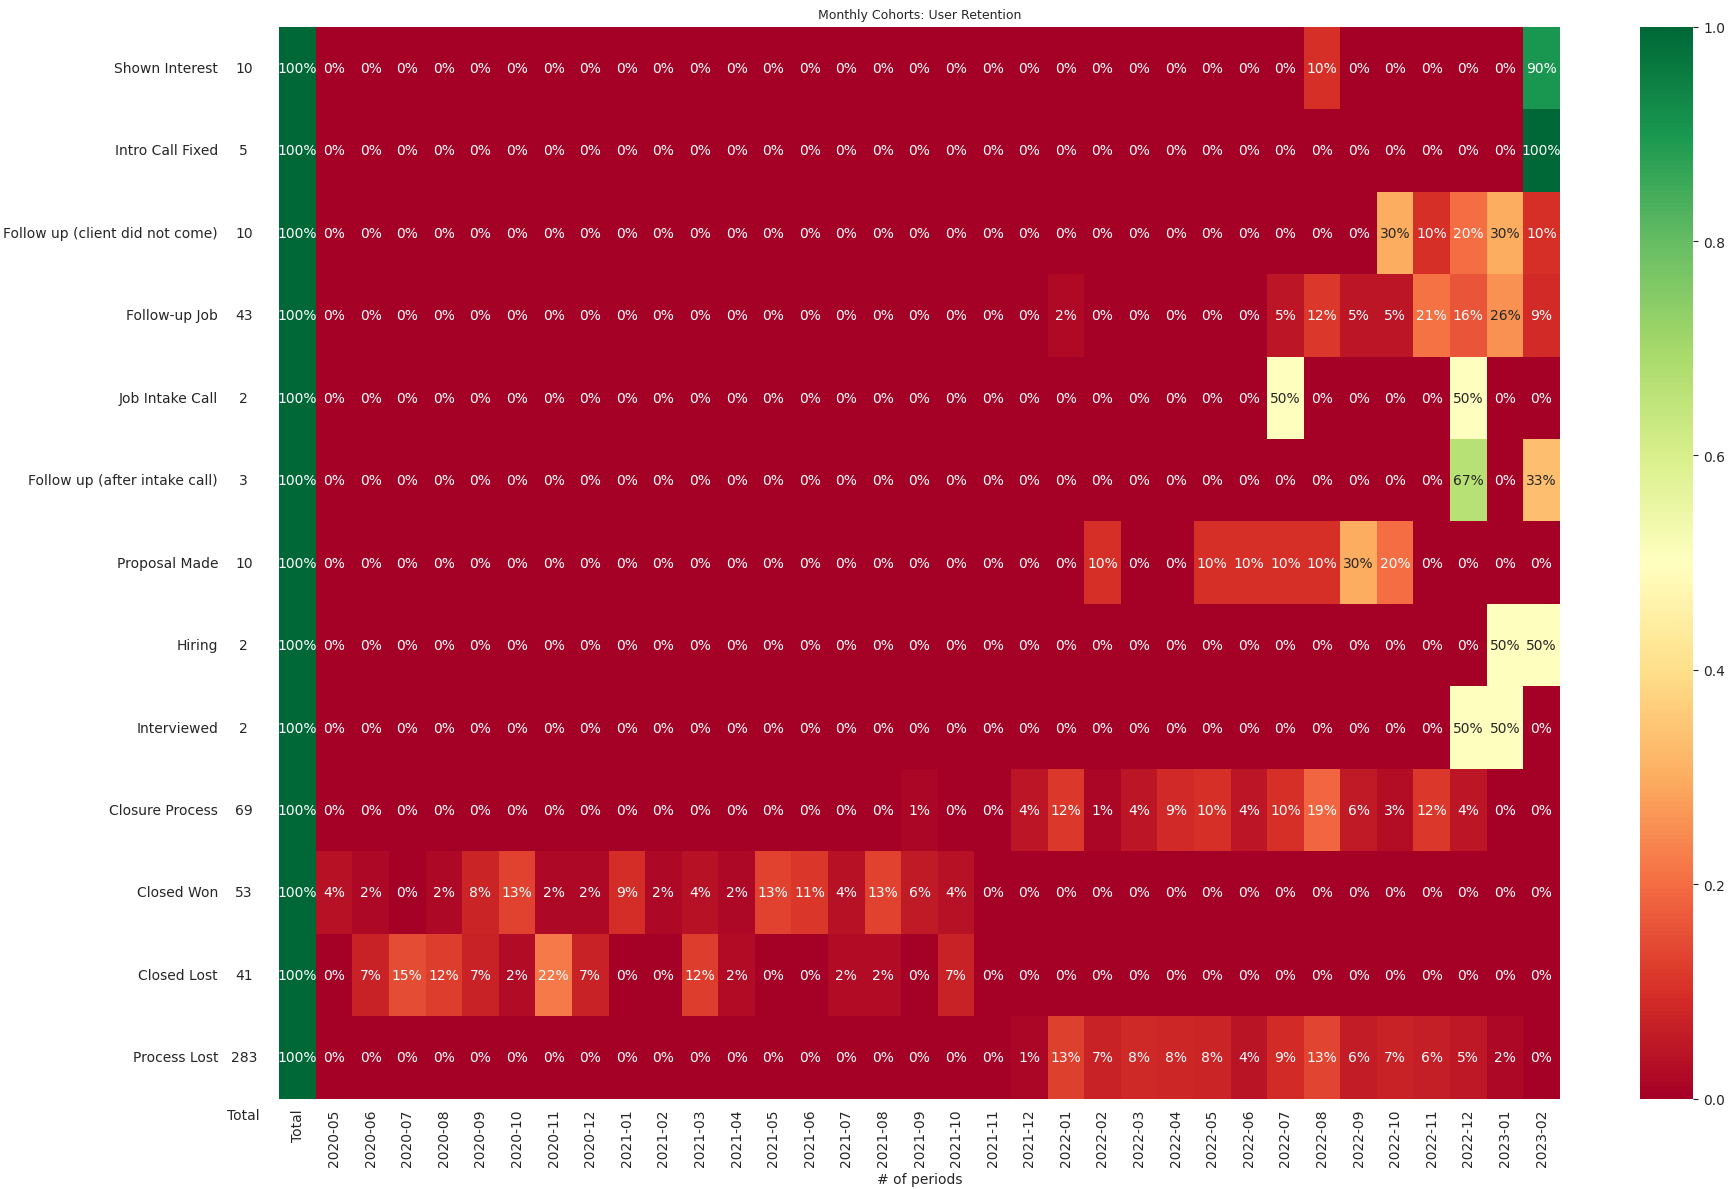

In [20]:
#code templates for plotting (matplotlib and seaborn used here)
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(19, 12), sharey=True, gridspec_kw={'width_ratios': [1,50]})

    # retention matrix
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=9)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
#Once the plot is ready, we saved it!
#plt.savefig(f'{os.getcwd()}/cohort1.jpeg')
#Done!